In [28]:
import pandas as pd
import yfinance as yf
import ta as talib
import numpy as np
import math

from finvizfinance.screener.overview import Overview
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [29]:
criteria = Overview()

# Criteria Set from CANSLIM method
filters_dic = {'Price':'Over $5', 'EPS growthqtr over qtr':'Over 20%', 'EPS growthpast 5 years':'Over 15%', 'InstitutionalOwnership':'Under 90%', 
               'Return on Equity':'Over +15%', '52-Week High/Low':'0-10% below High', 'Shares Outstanding': 'Under 50M', 'Price': 'Over $5', 'Average Volume': 'Over 100K'}

criteria.set_filter(filters_dict=filters_dic)

screened_stocks_df = criteria.screener_view()

In [30]:
screened_stocks_df

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,CLFD,"Clearfield, Inc.",Technology,Communication Equipment,USA,1.210000e+09,43.10,103.02,-0.0056,281565.0
1,CVLG,"Covenant Logistics Group, Inc.",Industrials,Trucking,USA,5.177500e+08,6.72,32.79,0.0403,134089.0
2,GLP,Global Partners LP,Energy,Oil & Gas Midstream,USA,9.426700e+08,12.45,28.30,-0.0018,90589.0
3,MGPI,"MGP Ingredients, Inc.",Consumer Defensive,Packaged Foods,USA,2.230000e+09,20.19,101.95,-0.0414,157615.0
4,MUSA,Murphy USA Inc.,Consumer Cyclical,Specialty Retail,USA,6.300000e+09,13.19,287.55,0.0139,268666.0
5,OTTR,Otter Tail Corporation,Utilities,Utilities - Diversified,USA,3.020000e+09,14.43,75.30,-0.0391,290545.0
6,SRTS,"Sensus Healthcare, Inc.",Healthcare,Medical Devices,USA,1.768000e+08,8.71,11.19,0.0090,184328.0
7,USAK,"USA Truck, Inc.",Industrials,Trucking,USA,2.815200e+08,8.21,31.28,0.0026,127419.0


In [31]:
tickers = list(screened_stocks_df.Ticker)
tickers

['CLFD', 'CVLG', 'GLP', 'MGPI', 'MUSA', 'OTTR', 'SRTS', 'USAK']

In [32]:
yf_data = yf.download(tickers, '2021-01-01','2022-07-30')

[*********************100%***********************]  8 of 8 completed


In [35]:
all_stock_df = {}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
947/947 [==============================] - 16s 14ms/step - loss: 7.2861e-04
Epoch 2/3
947/947 [==============================] - 15s 16ms/step - loss: 2.9171e-04
Epoch 3/

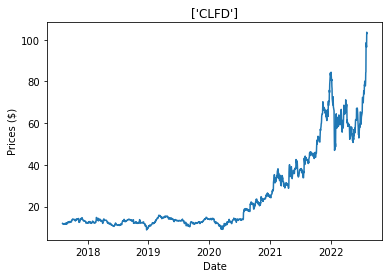

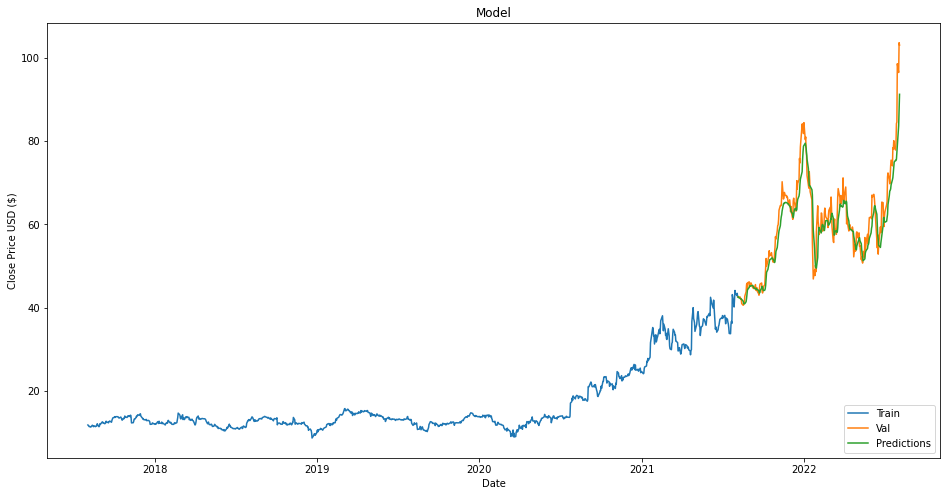

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
947/947 [==============================] - 17s 16ms/step - loss: 0.0029
Epoch 2/3
947/947 [==============================] - 18s 19ms/step - loss: 0.0015
Epoch 3/3
8/8 [=

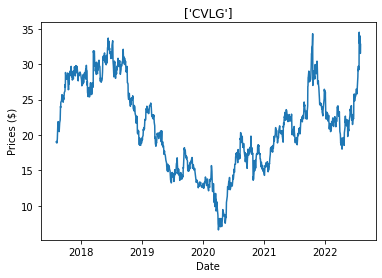

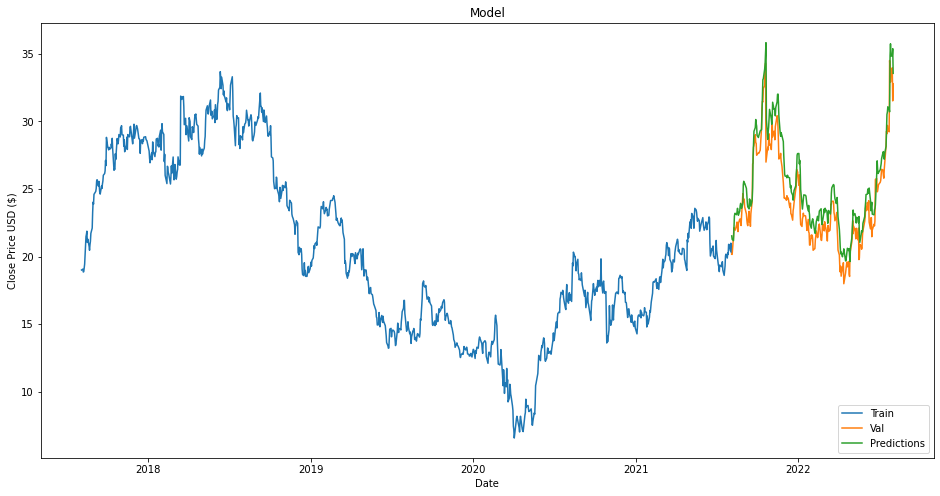

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 25)                2525      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
947/947 [==============================] - 20s 19ms/step - loss: 0.0020
Epoch 2/3
947/947 [==============================] - 18s 19ms/step - loss: 7.5209e-04
Epoch 3/3
8/

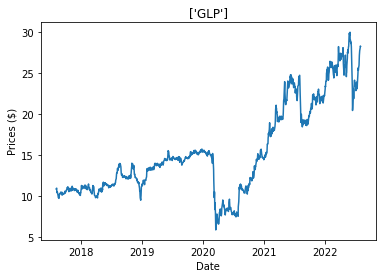

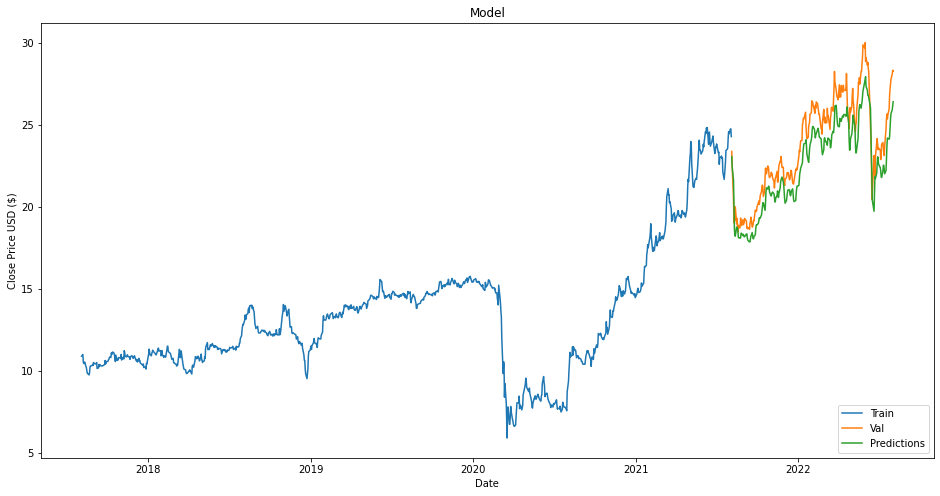

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                                 
 dense_8 (Dense)             (None, 25)                2525      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
947/947 [==============================] - 20s 19ms/step - loss: 0.0040
Epoch 2/3
947/947 [==============================] - 18s 19ms/step - loss: 0.0016
Epoch 3/3
8/8 [=

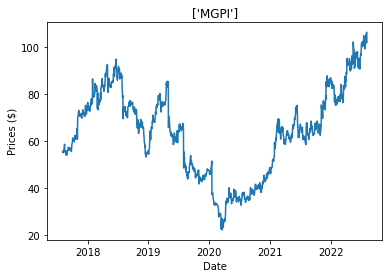

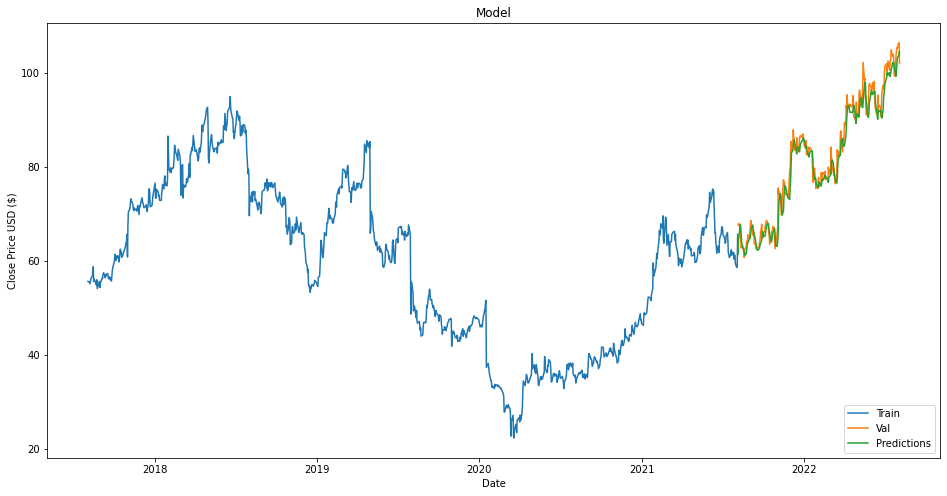

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_10 (Dense)            (None, 25)                2525      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
947/947 [==============================] - 20s 19ms/step - loss: 5.6284e-04
Epoch 2/3
947/947 [==============================] - 18s 19ms/step - loss: 3.2795e-04
Epoch 3/

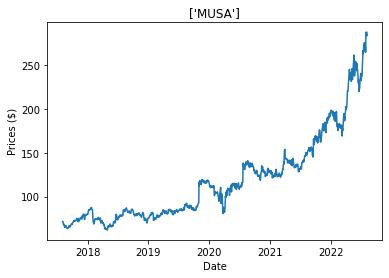

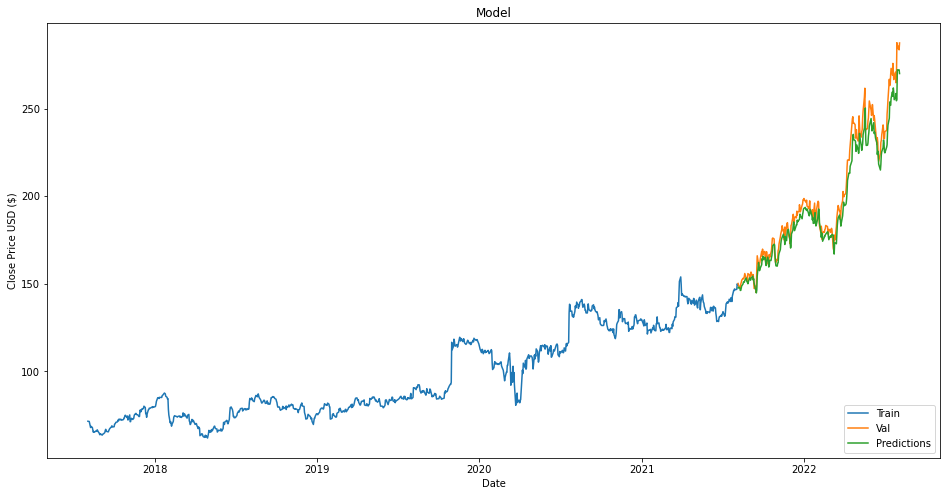

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 100)               80400     
                                                                 
 dense_12 (Dense)            (None, 25)                2525      
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
947/947 [==============================] - 20s 19ms/step - loss: 0.0014
Epoch 2/3
947/947 [==============================] - 18s 19ms/step - loss: 7.2991e-04
Epoch 3/3
8/

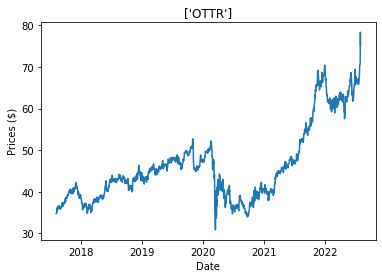

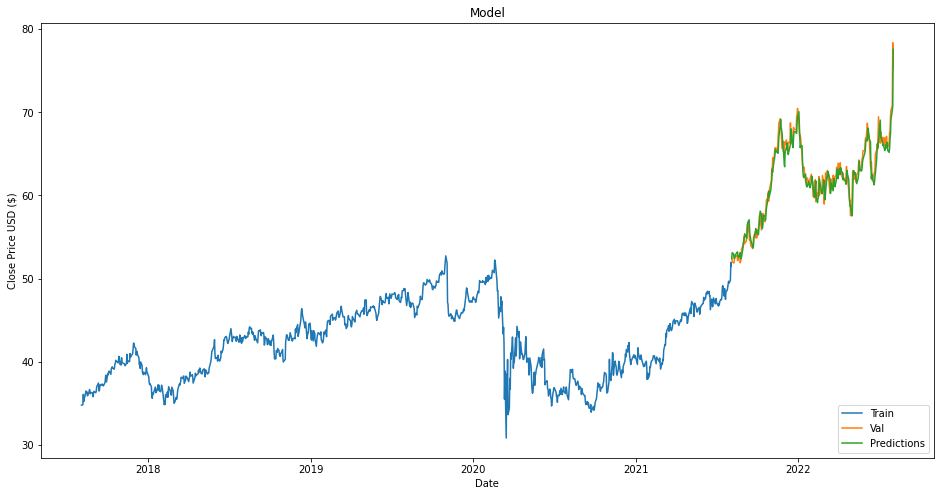

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_15 (LSTM)              (None, 100)               80400     
                                                                 
 dense_14 (Dense)            (None, 25)                2525      
                                                                 
 dense_15 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
947/947 [==============================] - 20s 19ms/step - loss: 0.0022
Epoch 2/3
947/947 [==============================] - 18s 19ms/step - loss: 0.0011
Epoch 3/3
8/8 [=

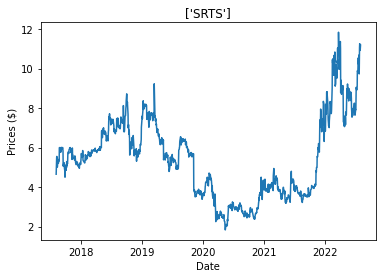

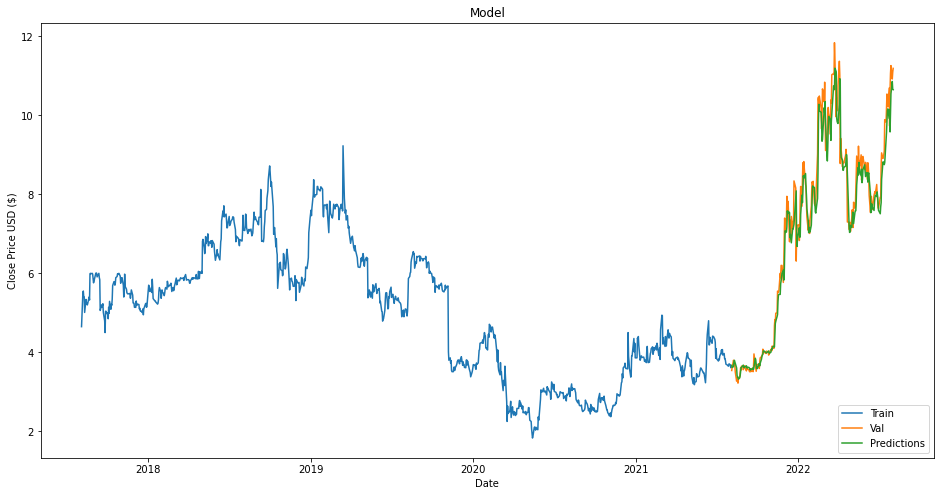

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_17 (LSTM)              (None, 100)               80400     
                                                                 
 dense_16 (Dense)            (None, 25)                2525      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
947/947 [==============================] - 21s 20ms/step - loss: 0.0028
Epoch 2/3
947/947 [==============================] - 19s 20ms/step - loss: 0.0013
Epoch 3/3
8/8 [=

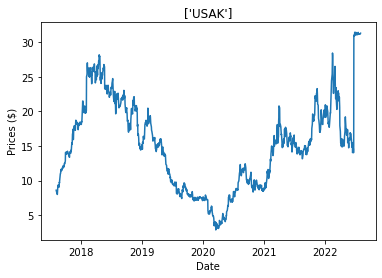

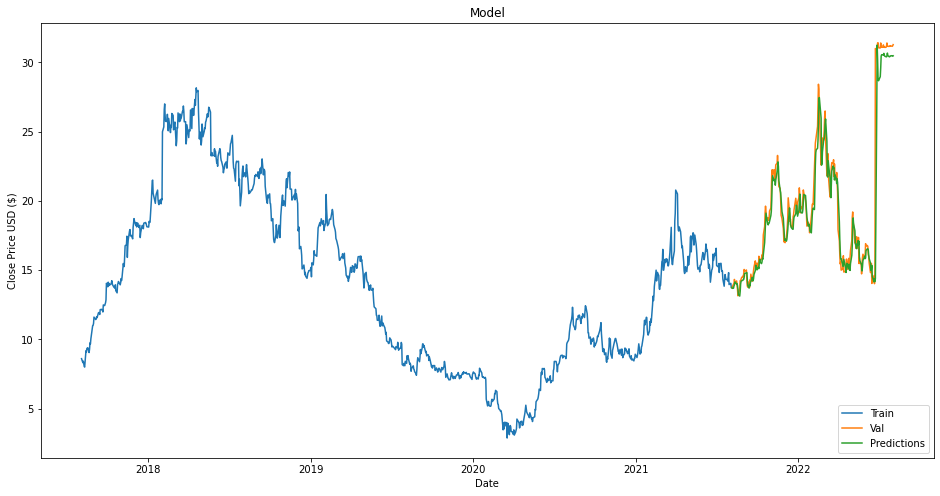

In [41]:
for ticker in tickers:
    stock = yf.Ticker(ticker)
    stock_hist = stock.history(period='5y')
    stock_hist = stock_hist.drop(columns=["Dividends", "Stock Splits"])
    stock_hist['Ticker'] = (ticker)
    col = stock_hist.pop('Ticker')
    stock_hist.insert(loc=0, column='Ticker', value=col)
    stock_hist.dropna()
    all_stock_df[ticker] = pd.DataFrame(stock_hist)
    
    plt.figure()
    plt.title([ticker])
    plt.plot(all_stock_df[ticker]['Close'])
    plt.xlabel('Date')
    plt.ylabel('Prices ($)')
    
    close_prices = all_stock_df[ticker]['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    train_data = scaled_data[0: training_data_len, :]

    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    model = keras.Sequential()
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=False))
    model.add(layers.Dense(25))
    model.add(layers.Dense(1))
    model.summary()
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size= 1, epochs=3)
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(np.mean(predictions - y_test)**2)
    rmse
    
    data = all_stock_df[ticker].filter(['Close'])
    train = data[:training_data_len]
    validation = data[training_data_len:]
    validation['Predictions'] = predictions
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train)
    plt.plot(validation[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()